<a href="https://colab.research.google.com/github/enthusiham/Master-s-thesis-/blob/main/09.%20More_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df_main = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_main_final.csv")
df_refer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_refer_final.csv")

In [ ]:
df_refer.head()

,abstract,authors,n_citation,references,title,venue,year,id,ref_abstract,ref_authors,ref_n_citation,ref_references,ref_title,ref_venue,ref_year,BoW_Cos,tfidf_Cos,w2v_Cos,Hellinger_sim,ref_readability,ref_ab_len,ref_verb_ratio,ref_title_len,ref_n_authors,ref_n_ref
0,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,6b19b1e6-81c5-4039-8a70-f3a2797f5447,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,The combination of hardware acceleration and f...,"['Heather Quinn', 'Laurie A. Smith King', 'Mir...",50,"['115b9e24-0791-4251-8777-24c38fea952f', '430c...",Runtime assignment of reconfigurable hardware ...,field programmable custom computing machines,2003,50.53,35.83,97.833942,0.055762,26.91,1617,0.010513,87,75,280
1,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,8823b473-17c0-4f1f-a084-f86ae4b29e63,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,This work presents a new scene change detectio...,"['Edmundo Saez', 'José Ignacio Benavides', 'Ni...",12,"['181e1f31-1580-454c-bdb8-7e46839d453d', '53fe...",Reliable real time scene change detection in M...,international conference on multimedia and expo,2004,40.34,27.34,95.954598,0.056383,54.93,626,0.017572,66,58,360
2,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,b9e545cf-0862-4ad2-873c-92740caca989,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,We discuss the use of Field Programmable Gate ...,"['Reid B. Porter', 'Kevin P. Mccabe', 'Neil W....",50,"['2633935f-57cc-40ad-9ee4-6dcb72aae169', '6a6b...",An applications approach to evolvable hardware,NaN,1999,44.90,31.00,97.354730,0.053860,7.05,643,0.021773,46,57,200
3,This paper presents the design and implementat...,"['Sergio R. Geninatti', 'José Ignacio Benavide...",0,ea135772-baf4-4fca-b689-7e0bf2861a2b,Concurrent calculations on reconfigurable logi...,International Journal of Reconfigurable Computing,2010,9cee0c22-b065-4e23-925d-68c1cfc75dbe,A parallel images processing field programmabl...,"['Takeaki Sugimura', 'JeoungChill Shim', 'Hiro...",7,['28f5ffcb-1076-49d0-9cf0-8a64694e2f67'],Parallel image processing field programmable g...,field-programmable technology,2003,39.51,27.00,95.772162,0.060595,41.06,523,0.015296,93,81,40
4,In this paper an approach to the performance a...,"['Srđan Jovković', 'Stefan Panic', 'Mihajlo C....",50,11a9d4ce-e21c-4f59-bf52-e2cc3b52de45,Performance analysis of SSC diversity receiver...,Eurasip Journal on Wireless Communications and...,2010,a024dd21-83ad-4def-bfa5-8f714f502687,This paper describes a method of deriving chan...,"['Klaus Witrisal', 'Yong-Ho Kim', 'Ramjee Pras...",79,"['47b6b7ee-1947-453a-b664-e2e1f9f31def', '7291...",A new method to measure parameters of frequenc...,IEEE Transactions on Communications,2001,51.55,38.91,97.863651,0.068237,34.15,1522,0.020368,97,50,160


In [ ]:
df_refer.drop(columns= ['Unnamed: 0',	'Unnamed: 0.1',	'Unnamed: 0.1.1',	'Unnamed: 0.1.1.1',	'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 
                        'ref_index', 'ref_LDA_topics',	'LDA_topics', 'ref_pos_tag',	'ref_verbs',	'ref_verb_count'], inplace=True)

In [ ]:
#ref_title_len	
ref_title_len=[]
for index, row in df_refer.iterrows():
    length = len(row['ref_title'])
    ref_title_len.append(length)

df_refer['ref_title_len'] = ref_title_len




In [ ]:

#ref_n_authors
ref_n_authors=[]
for index, row in df_refer.iterrows():
    length = len(row['ref_authors'])
    ref_n_authors.append(length)

df_refer['ref_n_authors'] = ref_n_authors


In [ ]:
#ref_n_ref
df_refer.loc[df_refer['ref_references'].isnull(), ['ref_references']] = df_refer.loc[df_refer['ref_references'].isnull(),'ref_references'].apply(lambda x: [])

ref_n_ref =[]
for index, row in df_refer.iterrows():
    
    number = len(row['ref_references'])
    
    ref_n_ref.append(number)

df_refer['ref_n_ref'] = ref_n_ref

Merging it to main dataframe

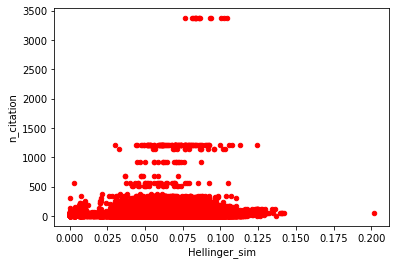

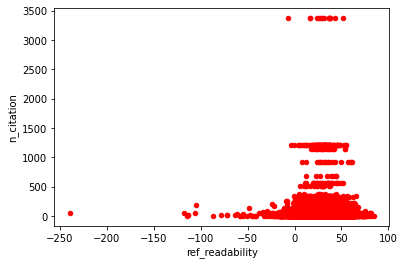

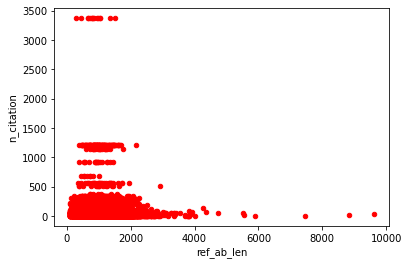

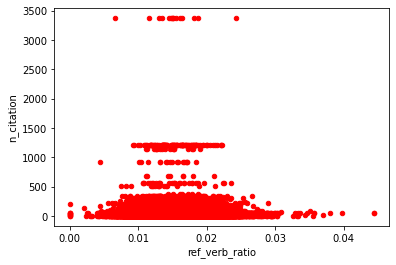

In [ ]:
#Hellinger_sim	ref_readability	ref_ab_len	ref_verb_ratio	ref_title_len	ref_n_authors	ref_n_ref

df_refer.plot(kind='scatter', x='Hellinger_sim', y='n_citation', color='r')    
df_refer.plot(kind='scatter', x='ref_readability', y='n_citation', color='r')    
df_refer.plot(kind='scatter', x='ref_ab_len', y='n_citation', color='r') 
df_refer.plot(kind='scatter', x='ref_verb_ratio', y='n_citation', color='r') 

In [ ]:
mean_values = pd.pivot_table(df_refer, values=['Hellinger_sim',	'ref_readability',	'ref_ab_len',	'ref_verb_ratio',
                                                   'ref_title_len',	'ref_n_authors',	'ref_n_ref'], 
                                                    index=['id'], columns=None, aggfunc='mean')
df_main2 = pd.merge(df_main, mean_values,  on='id')

In [ ]:
sd_values = pd.pivot_table(df_refer, values=['Hellinger_sim',	'ref_readability',	'ref_ab_len',	'ref_verb_ratio',
                                                   'ref_title_len',	'ref_n_authors',	'ref_n_ref'], 
                                                    index=['id'], columns=None, aggfunc='std')
df_main2 = pd.merge(df_main2, sd_values,  on='id')

In [ ]:
df_main2.rename(columns = {'Hellinger_sim_x': 'mean_Hellinger_sim', 'ref_ab_len_x': 'mean_ref_ab_len', 'ref_n_authors_x': 'mean_ref_n_authors',
                 'ref_n_ref_x': 'mean_ref_n_ref', 'ref_readability_x': 'mean_ref_readability', 'ref_title_len_x': 'mean_ref_title_len',
                 'ref_verb_ratio_x': 'mean_ref_verb_ratio', 'Hellinger_sim_y': 'sd_Hellinger_sim', 'ref_ab_len_y': 'sd_ref_ab_len',
                 'ref_n_authors_y': 'sd_ref_n_authors', 'ref_n_ref_y': 'sd_ref_n_ref',	'ref_readability_y': 'sd_ref_readability', 
                 'ref_title_len_y':	'sd_ref_title_len', 'ref_verb_ratio_y': 'sd_ref_verb_ratio'}, inplace=True)

In [ ]:
df_main2.head()

,Unnamed: 0,abstract,authors,n_citation,references_x,title,venue,year,id,title_len,n_authors,n_references,ab_len,impact_1y,sentiment,negative,positive,mean_BoW_Cos,mean_tfidf_Cos,mean_w2v_Cos,sd_Bow_Cos,sd_tfidf_Cos,sd_w2v_Cos,med_ref_year,skew_ref_year,med_ref_n_citation,skew_ref_n_citation,readability_score,verb_ratio,mean_LDA_Sim,sd_LDA_sim,LDA_title,main_journal,main_conf,main_review,main_meta,ref_conf,ref_journal,ref_meta,ref_review,mean_Hellinger_sim,mean_ref_ab_len,mean_ref_n_authors,mean_ref_n_ref,mean_ref_readability,mean_ref_title_len,mean_ref_verb_ratio,sd_Hellinger_sim,sd_ref_ab_len,sd_ref_n_authors,sd_ref_n_ref,sd_ref_readability,sd_ref_title_len,sd_ref_verb_ratio
0,0,A lack of security metrics signifies that it i...,"['Daniel Mellado', 'Eduardo Fernández-Medina',...",50,"['10b75e75-a047-4182-9e62-70dc936d7828', '1fa4...",a comparison of software design security metrics,european conference on software architecture,2010,4685d94f-92f2-4f30-ac01-716fa6b9bebd,7,64,10,132,0,"{'neg': 0.016, 'neu': 0.806, 'pos': 0.178, 'co...",0.016,0.178,57.800000,57.800000,97.624871,7.999053,7.999053,1.189633,2007.0,-0.901423,50.0,1.941277,39.282500,0.121212,0.066753,0.003828,[<gensim.interfaces.TransformedCorpus object a...,0,1,0,0,0.300000,0.000000,0.0,0.0,0.066753,1073.000000,46.600000,496.000000,20.627000,63.000000,0.014280,0.003828,464.498535,17.658489,328.876877,15.480330,30.081371,0.003090
1,1,Inferring the relationship among proteins is a...,"['Tsuyoshi Kato', 'Kinya Okada', 'Hisashi Kash...",5,"['0e42b5be-f8f9-4e21-b824-e97a8dacb7f2', '40fc...",a transfer learning approach and selective int...,international journal of knowledge discovery i...,2010,09da7272-e296-4fbc-9b32-fe6280481e3f,16,71,13,111,0,"{'neg': 0.012, 'neu': 0.936, 'pos': 0.052, 'co...",0.012,0.052,46.151538,46.151538,96.517091,9.437822,9.437822,1.390865,2005.0,-1.253350,254.0,3.445573,34.022622,0.117117,0.065251,0.015897,[<gensim.interfaces.TransformedCorpus object a...,1,0,0,0,0.076923,0.230769,0.0,0.0,0.065251,1165.846154,79.692308,406.153846,23.547692,63.153846,0.015355,0.015897,488.605643,62.649002,147.735037,13.647152,26.962462,0.003697
2,2,We consider a scheduling environment with m (m...,"['Joseph Y.-T. Leung', 'Michael Pinedo', 'Guoh...",139,"['0fb1bda8-1de2-4acb-bfac-8bdfbf7f0758', '37a5...",competitive two-agent scheduling and its appli...,operations research,2010,ea7a3609-3342-477a-ac8c-00d65a6c16e5,6,54,15,216,7348,"{'neg': 0.049, 'neu': 0.869, 'pos': 0.081, 'co...",0.049,0.081,53.536667,53.536667,96.997585,10.623476,10.623476,1.336878,2003.0,-0.762319,156.0,1.840840,53.229630,0.078704,0.046281,0.017440,[<gensim.interfaces.TransformedCorpus object a...,0,0,0,0,0.000000,0.266667,0.0,0.0,0.046281,650.133333,43.600000,157.466667,48.332667,59.533333,0.014180,0.017440,277.717705,18.216162,100.593856,13.713454,21.516992,0.005247
3,3,The increasing abundance of data about the tra...,"['Anna Monreale', 'Roberto Trasarti', 'Chiara ...",11,"['033ba9d6-18b8-4bfb-b9ca-f3a01bac5c85', '11ca...",preserving privacy in semantic-rich trajectori...,advances in geographic information systems,2010,d3c00b34-560a-4593-9a83-a4512275805e,8,88,17,167,4570,"{'neg': 0.075, 'neu': 0.858, 'pos': 0.067, 'co...",0.075,0.067,52.542353,52.542353,97.845534,9.770623,9.770623,0.754648,2008.0,-0.652015,246.0,1.853376,45.155699,0.131737,0.079046,0.016802,[<gensim.interfaces.TransformedCorpus object a...,0,0,0,0,0.235294,0.000000,0.0,0.0,0.079046,1191.235294,71.058824,915.294118,33.417647,59.529412,0.014599,0.016802,390.818777,37.005862,638.886900,9.531897,15.496442,0.003373
4,4,A variational phase field model is proposed fo...,"['Liyong Zhu', 'Yu Wang', 'Lili Ju', 'Desheng ...",50,"['2925bdbc-9cec-4cd0-a5c0-2688a1366b80', '3219...",a variational phase field method for curve smo...,journal of computational physics,2010,76eccb84-3f46-414a-91f1-fbbfb292ed86,8,52,11,103,25006,"{'neg': 0.026, 'neu': 0.843, 'pos': 0.13, 'com...",0.026,0.130,54.053636,54.053636,96.840981,8.228775,8.228775,0.81663

In [ ]:
df_main2.to_csv("/content/drive/My Drive/Colab Notebooks/df_merged8.csv")
df_refer.to_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref9.csv")

In [ ]:
df_main = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_merged8.csv")
df_refer = pd.read_csv("/content/drive/My Drive/Colab Notebooks/df_mer_ref9.csv")

In [ ]:
##result too many nans
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in df_main.columns:
  if df_main[c].dtype in numerics:
    df_main['ln_'+c] = np.log(df_main[c])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_main.head()

,Unnamed: 0,abstract,authors,n_citation,references_x,title,venue,year,id,title_len,n_authors,n_references,ab_len,impact_1y,sentiment,negative,positive,mean_BoW_Cos,mean_tfidf_Cos,mean_w2v_Cos,sd_Bow_Cos,sd_tfidf_Cos,sd_w2v_Cos,med_ref_year,skew_ref_year,med_ref_n_citation,skew_ref_n_citation,readability_score,verb_ratio,mean_LDA_Sim,sd_LDA_sim,LDA_title,main_journal,main_conf,main_review,main_meta,ref_conf,ref_journal,ref_meta,ref_review,ln_Unnamed: 0,ln_n_citation,ln_year,ln_title_len,ln_n_authors,ln_n_references,ln_ab_len,ln_impact_1y,ln_negative,ln_positive,ln_mean_BoW_Cos,ln_mean_tfidf_Cos,ln_mean_w2v_Cos,ln_sd_Bow_Cos,ln_sd_tfidf_Cos,ln_sd_w2v_Cos,ln_med_ref_year,ln_skew_ref_year,ln_med_ref_n_citation,ln_skew_ref_n_citation,ln_readability_score,ln_verb_ratio,ln_mean_LDA_Sim,ln_sd_LDA_sim,ln_main_journal,ln_main_conf,ln_main_review,ln_main_meta,ln_ref_conf,ln_ref_journal,ln_ref_meta,ln_ref_review
0,0,A lack of security metrics signifies that it i...,"['Daniel Mellado', 'Eduardo Fernández-Medina',...",50,"['10b75e75-a047-4182-9e62-70dc936d7828', '1fa4...",a comparison of software design security metrics,european conference on software architecture,2010,4685d94f-92f2-4f30-ac01-716fa6b9bebd,7,64,10,132,0,"{'neg': 0.016, 'neu': 0.806, 'pos': 0.178, 'co...",0.016,0.178,57.800000,57.800000,97.624871,7.999053,7.999053,1.189633,2007.0,-0.901423,50.0,1.941277,39.282500,0.121212,0.066753,0.003828,[<gensim.interfaces.TransformedCorpus object a...,0,1,0,0,0.300000,0.000000,0.0,0.0,-inf,3.912023,7.60589,1.945910,4.158883,2.302585,4.882802,-inf,-4.135167,-1.725972,4.056989,4.056989,4.581132,2.079323,2.079323,0.173645,7.604396,NaN,3.912023,0.663346,3.670779,-2.110213,-2.706757,-5.565459,-inf,0.0,-inf,-inf,-1.203973,-inf,-inf,-inf
1,1,Inferring the relationship among proteins is a...,"['Tsuyoshi Kato', 'Kinya Okada', 'Hisashi Kash...",5,"['0e42b5be-f8f9-4e21-b824-e97a8dacb7f2', '40fc...",a transfer learning approach and selective int...,international journal of knowledge discovery i...,2010,09da7272-e296-4fbc-9b32-fe6280481e3f,16,71,13,111,0,"{'neg': 0.012, 'neu': 0.936, 'pos': 0.052, 'co...",0.012,0.052,46.151538,46.151538,96.517091,9.437822,9.437822,1.390865,2005.0,-1.253350,254.0,3.445573,34.022622,0.117117,0.065251,0.015897,[<gensim.interfaces.TransformedCorpus object a...,1,0,0,0,0.076923,0.230769,0.0,0.0,0.000000,1.609438,7.60589,2.772589,4.262680,2.564949,4.709530,-inf,-4.422849,-2.956512,3.831930,3.831930,4.569720,2.244725,2.244725,0.329926,7.603399,NaN,5.537334,1.237090,3.527026,-2.144581,-2.729515,-4.141640,0.0,-inf,-inf,-inf,-2.564949,-1.466337,-inf,-inf
2,2,We consider a scheduling environment with m (m...,"['Joseph Y.-T. Leung', 'Michael Pinedo', 'Guoh...",139,"['0fb1bda8-1de2-4acb-bfac-8bdfbf7f0758', '37a5...",competitive two-agent scheduling and its appli...,operations research,2010,ea7a3609-3342-477a-ac8c-00d65a6c16e5,6,54,15,216,7348,"{'neg': 0.049, 'neu': 0.869, 'pos': 0.081, 'co...",0.049,0.081,53.536667,53.536667,96.997585,10.623476,10.623476,1.336878,2003.0,-0.762319,156.0,1.840840,53.229630,0.078704,0.046281,0.017440,[<gensim.interfaces.TransformedCorpus object a...,0,0,0,0,0.000000,0.266667,0.0,0.0,0.693147,4.934474,7.60589,1.791759,3.988984,2.708050,5.375278,8.902183,-3.015935,-2.513306,3.980367,3.980367,4.574686,2.363066,2.363066,0.290337,7.602401,NaN,5.049856,0.610222,3.974615,-2.542065,-3.073016,-4.048961,-inf,-inf,-inf,-inf,-inf,-1.321756,-inf,-inf
3,3,The increasing abundance of data about the tra...,"['Anna Monreale', 'Roberto Trasarti', 'Chiara ...",11,"['033ba9d6-18b8-4bfb-b9ca-f3a01bac5c85', '11ca...",preserving privacy in semantic-rich trajectori...,advances in geographic information systems,2010,d3c00b34-560a-4593-9a83-a4512275805e,8,88,17,167,4570,"{'neg': 0.075, 'neu': 0.858, 'pos': 0.067, 'co...",0.075,0.067,52.542353,52.542353,97.845534,9.770623,9.770623,0.754648,2008.0,-0.652015,246.0,1.853376,45.155699,0.131737,0.079046,0.016802,[<gensim.interfaces.TransformedCorpus object a...,0,0,0,0,0.235294,0.0

In [ ]:
#sqrt looks much better than ln

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in df_main.columns:
  if df_main[c].dtype in numerics:
    df_main['sqrt_'+c] = np.sqrt(df_main[c])


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_main.head()

,Unnamed: 0,Unnamed: 0.1,abstract,authors,n_citation,references_x,title,venue,year,id,title_len,n_authors,n_references,ab_len,impact_1y,sentiment,negative,positive,mean_BoW_Cos,mean_tfidf_Cos,mean_w2v_Cos,sd_Bow_Cos,sd_tfidf_Cos,sd_w2v_Cos,med_ref_year,skew_ref_year,med_ref_n_citation,skew_ref_n_citation,readability_score,verb_ratio,mean_LDA_Sim,sd_LDA_sim,LDA_title,main_journal,main_conf,main_review,main_meta,ref_conf,ref_journal,ref_meta,ref_review,mean_Hellinger_sim,mean_ref_ab_len,mean_ref_n_authors,mean_ref_n_ref,mean_ref_readability,mean_ref_title_len,mean_ref_verb_ratio,sd_Hellinger_sim,sd_ref_ab_len,sd_ref_n_authors,sd_ref_n_ref,sd_ref_readability,sd_ref_title_len,sd_ref_verb_ratio,sqrt_Unnamed: 0,sqrt_Unnamed: 0.1,sqrt_n_citation,sqrt_year,sqrt_title_len,sqrt_n_authors,sqrt_n_references,sqrt_ab_len,sqrt_impact_1y,sqrt_negative,sqrt_positive,sqrt_mean_BoW_Cos,sqrt_mean_tfidf_Cos,sqrt_mean_w2v_Cos,sqrt_sd_Bow_Cos,sqrt_sd_tfidf_Cos,sqrt_sd_w2v_Cos,sqrt_med_ref_year,sqrt_skew_ref_year,sqrt_med_ref_n_citation,sqrt_skew_ref_n_citation,sqrt_readability_score,sqrt_verb_ratio,sqrt_mean_LDA_Sim,sqrt_sd_LDA_sim,sqrt_main_journal,sqrt_main_conf,sqrt_main_review,sqrt_main_meta,sqrt_ref_conf,sqrt_ref_journal,sqrt_ref_meta,sqrt_ref_review,sqrt_mean_Hellinger_sim,sqrt_mean_ref_ab_len,sqrt_mean_ref_n_authors,sqrt_mean_ref_n_ref,sqrt_mean_ref_readability,sqrt_mean_ref_title_len,sqrt_mean_ref_verb_ratio,sqrt_sd_Hellinger_sim,sqrt_sd_ref_ab_len,sqrt_sd_ref_n_authors,sqrt_sd_ref_n_ref,sqrt_sd_ref_readability,sqrt_sd_ref_title_len,sqrt_sd_ref_verb_ratio
0,0,0,A lack of security metrics signifies that it i...,"['Daniel Mellado', 'Eduardo Fernández-Medina',...",50,"['10b75e75-a047-4182-9e62-70dc936d7828', '1fa4...",a comparison of software design security metrics,european conference on software architecture,2010,4685d94f-92f2-4f30-ac01-716fa6b9bebd,7,64,10,132,0,"{'neg': 0.016, 'neu': 0.806, 'pos': 0.178, 'co...",0.016,0.178,57.800000,57.800000,97.624871,7.999053,7.999053,1.189633,2007.0,-0.901423,50.0,1.941277,39.282500,0.121212,0.066753,0.003828,[<gensim.interfaces.TransformedCorpus object a...,0,1,0,0,0.300000,0.000000,0.0,0.0,0.066753,1073.000000,46.600000,496.000000,20.627000,63.000000,0.014280,0.003828,464.498535,17.658489,328.876877,15.480330,30.081371,0.003090,0.000000,0.000000,7.071068,44.833024,2.645751,8.000000,3.162278,11.489125,0.000000,0.126491,0.421900,7.602631,7.602631,9.880530,2.828260,2.828260,1.090703,44.799554,NaN,7.071068,1.393297,6.267575,0.348155,0.258366,0.061869,0.0,1.0,0.0,0.0,0.547723,0.000000,0.0,0.0,0.258366,32.756679,6.826419,22.271057,4.541696,7.937254,0.119500,0.061869,21.552228,4.202200,18.134963,3.934505,5.484649,0.055586
1,1,1,Inferring the relationship among proteins is a...,"['Tsuyoshi Kato', 'Kinya Okada', 'Hisashi Kash...",5,"['0e42b5be-f8f9-4e21-b824-e97a8dacb7f2', '40fc...",a transfer learning approach and selective int...,international journal of knowledge discovery i...,2010,09da7272-e296-4fbc-9b32-fe6280481e3f,16,71,13,111,0,"{'neg': 0.012, 'neu': 0.936, 'pos': 0.052, 'co...",0.012,0.052,46.151538,46.151538,96.517091,9.437822,9.437822,1.390865,2005.0,-1.253350,254.0,3.445573,34.022622,0.117117,0.065251,0.015897,[<gensim.interfaces.TransformedCorpus object a...,1,0,0,0,0.076923,0.230769,0.0,0.0,0.065251,1165.846154,79.692308,406.153846,23.547692,63.153846,0.015355,0.015897,488.605643,62.649002,147.735037,13.647152,26.962462,0.003697,1.000000,1.000000,2.236068,44.833024,4.000000,8.426150,3.605551,10.535654,0.000000,0.109545,0.228035,6.793492,6.793492,9.824311,3.072104,3.072104,1.179349,44.777226,NaN,15.937377,1.856225,5.832891,0.342224,0.255443,0.126082,1.0,0.0,0.0,0.0,0.277350,0.480384,0.0,0.0,0.255443,34.144489,8.927055,20.153259,4.852596,7.946939,0.123914,0.126082,22.104426,7.915112,12.154630,3.694205,5.192539,0.060803
2,2,2,We consider a scheduling environment with m (m...,"['Joseph Y.-T. Leung', 'Michael Pinedo', 'Guoh...",139,"['0fb1bda8-1de2-4acb-bfac-8bdfbf7f0758', '37a5...",competitive two-a

In [ ]:
df_main.drop(['Unnamed: 0','Unnamed: 0.1', 'sqrt_skew_ref_year', 'LDA_title', 
              'sqrt_Unnamed: 0',	'sqrt_Unnamed: 0.1', 'sqrt_n_citation', 'sqrt_year', 
              'sqrt_main_journal',	'sqrt_main_conf',	'sqrt_main_review',	'sqrt_main_meta',
              'sqrt_ref_conf',	'sqrt_ref_journal',	'sqrt_ref_meta',	'sqrt_ref_review'], axis=1, inplace=True)

In [ ]:
df_main.dropna(axis=1, inplace=True)

In [ ]:
df_main.head()

,abstract,authors,n_citation,references_x,title,venue,year,id,title_len,n_authors,n_references,ab_len,impact_1y,negative,positive,mean_BoW_Cos,mean_tfidf_Cos,mean_w2v_Cos,sd_Bow_Cos,sd_tfidf_Cos,sd_w2v_Cos,med_ref_year,skew_ref_year,med_ref_n_citation,skew_ref_n_citation,readability_score,verb_ratio,mean_LDA_Sim,sd_LDA_sim,main_journal,main_conf,main_review,main_meta,ref_conf,ref_journal,ref_meta,ref_review,mean_Hellinger_sim,mean_ref_ab_len,mean_ref_n_authors,mean_ref_n_ref,mean_ref_readability,mean_ref_title_len,mean_ref_verb_ratio,sd_Hellinger_sim,sd_ref_ab_len,sd_ref_n_authors,sd_ref_n_ref,sd_ref_readability,sd_ref_title_len,sd_ref_verb_ratio,sqrt_title_len,sqrt_n_authors,sqrt_n_references,sqrt_ab_len,sqrt_impact_1y,sqrt_negative,sqrt_positive,sqrt_mean_BoW_Cos,sqrt_mean_tfidf_Cos,sqrt_mean_w2v_Cos,sqrt_sd_Bow_Cos,sqrt_sd_tfidf_Cos,sqrt_sd_w2v_Cos,sqrt_med_ref_year,sqrt_med_ref_n_citation,sqrt_verb_ratio,sqrt_mean_LDA_Sim,sqrt_sd_LDA_sim,sqrt_mean_Hellinger_sim,sqrt_mean_ref_ab_len,sqrt_mean_ref_n_authors,sqrt_mean_ref_n_ref,sqrt_mean_ref_title_len,sqrt_mean_ref_verb_ratio,sqrt_sd_Hellinger_sim,sqrt_sd_ref_ab_len,sqrt_sd_ref_n_authors,sqrt_sd_ref_n_ref,sqrt_sd_ref_readability,sqrt_sd_ref_title_len,sqrt_sd_ref_verb_ratio
0,A lack of security metrics signifies that it i...,"['Daniel Mellado', 'Eduardo Fernández-Medina',...",50,"['10b75e75-a047-4182-9e62-70dc936d7828', '1fa4...",a comparison of software design security metrics,european conference on software architecture,2010,4685d94f-92f2-4f30-ac01-716fa6b9bebd,7,64,10,132,0,0.016,0.178,57.800000,57.800000,97.624871,7.999053,7.999053,1.189633,2007.0,-0.901423,50.0,1.941277,39.282500,0.121212,0.066753,0.003828,0,1,0,0,0.300000,0.000000,0.0,0.0,0.066753,1073.000000,46.600000,496.000000,20.627000,63.000000,0.014280,0.003828,464.498535,17.658489,328.876877,15.480330,30.081371,0.003090,2.645751,8.000000,3.162278,11.489125,0.000000,0.126491,0.421900,7.602631,7.602631,9.880530,2.828260,2.828260,1.090703,44.799554,7.071068,0.348155,0.258366,0.061869,0.258366,32.756679,6.826419,22.271057,7.937254,0.119500,0.061869,21.552228,4.202200,18.134963,3.934505,5.484649,0.055586
1,Inferring the relationship among proteins is a...,"['Tsuyoshi Kato', 'Kinya Okada', 'Hisashi Kash...",5,"['0e42b5be-f8f9-4e21-b824-e97a8dacb7f2', '40fc...",a transfer learning approach and selective int...,international journal of knowledge discovery i...,2010,09da7272-e296-4fbc-9b32-fe6280481e3f,16,71,13,111,0,0.012,0.052,46.151538,46.151538,96.517091,9.437822,9.437822,1.390865,2005.0,-1.253350,254.0,3.445573,34.022622,0.117117,0.065251,0.015897,1,0,0,0,0.076923,0.230769,0.0,0.0,0.065251,1165.846154,79.692308,406.153846,23.547692,63.153846,0.015355,0.015897,488.605643,62.649002,147.735037,13.647152,26.962462,0.003697,4.000000,8.426150,3.605551,10.535654,0.000000,0.109545,0.228035,6.793492,6.793492,9.824311,3.072104,3.072104,1.179349,44.777226,15.937377,0.342224,0.255443,0.126082,0.255443,34.144489,8.927055,20.153259,7.946939,0.123914,0.126082,22.104426,7.915112,12.154630,3.694205,5.192539,0.060803
2,We consider a scheduling environment with m (m...,"['Joseph Y.-T. Leung', 'Michael Pinedo', 'Guoh...",139,"['0fb1bda8-1de2-4acb-bfac-8bdfbf7f0758', '37a5...",competitive two-agent scheduling and its appli...,operations research,2010,ea7a3609-3342-477a-ac8c-00d65a6c16e5,6,54,15,216,7348,0.049,0.081,53.536667,53.536667,96.997585,10.623476,10.623476,1.336878,2003.0,-0.762319,156.0,1.840840,53.229630,0.078704,0.046281,0.017440,0,0,0,0,0.000000,0.266667,0.0,0.0,0.046281,650.133333,43.600000,157.466667,48.332667,59.533333,0.014180,0.017440,277.717705,18.216162,100.593856,13.713454,21.516992,0.005247,2.449490,7.348469,3.872983,14.696938,85.720476,0.221359,0.284605,7.316875,7.316875,9.848735,3.259367,3.259367,1.156234,44.754888,12.489996,0.280542,0.215131,0.132062,0.215131,25.497712,6.603030,12.548572,7.715785,0.119080,0.132062,16.664864,4.268040,10.029649,3.703168,4.638641,0.072439
3,The increasing abundance of data about the t

In [ ]:
df_main.to_csv("/content/drive/My Drive/Colab Notebooks/df_merged9.csv")